# Author : Talib Divan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
df = pd.read_csv("Iris.csv")

In [3]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Check first five record 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
#check datatypes of the variables

In [6]:
df.shape

(150, 6)

In [ ]:
#check number rows and columns of the dataset

In [8]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#check missing/null values in dataset

In [9]:
df.isna().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
#check n/a values in the dataset

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [ ]:
#descriptive statistics

<AxesSubplot: >

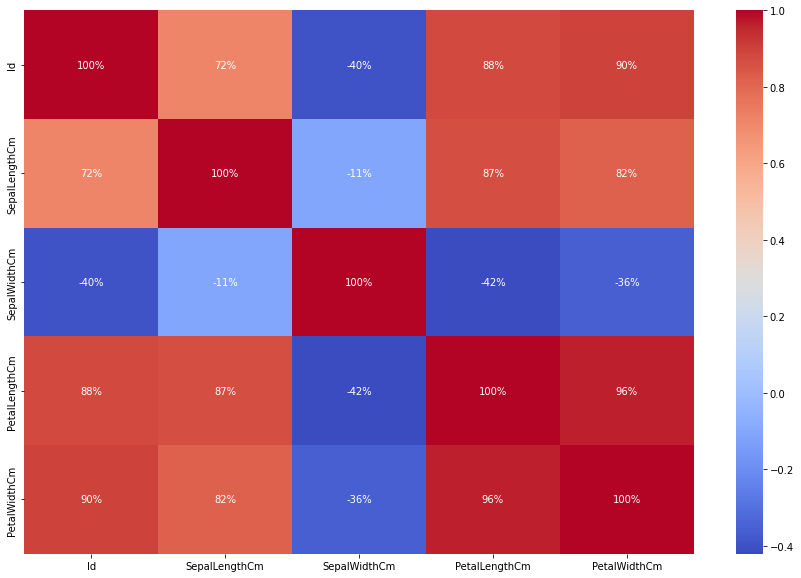

In [11]:
plt.figure(figsize=(15,10))
cor=df.corr()
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.0%')

In [ ]:
#correlation among variables

In [ ]:
#Insights
1. Strong positive correlation between PetalWidthCm and PetalLengthCm
2. Strong positive correlation between PetalWidthCm and SepalLengthCm
3. Weak negative correlation between PetalWidthCm and SepalWidthCm

In [13]:
#dropping 'id' from dataset
df.drop(['Id'],axis=1, inplace = True)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [16]:
df.Species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
#scatter plot

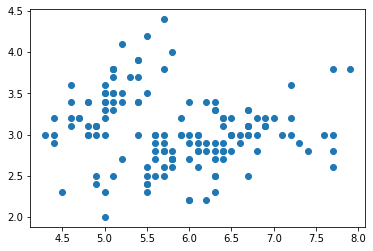

In [17]:
plt.scatter(df['SepalLengthCm'],df['SepalWidthCm'])
plt.show()

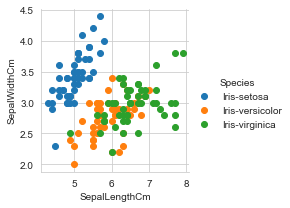

In [18]:
sns.set_style('whitegrid')
sns.FacetGrid(df,hue='Species') \
   .map(plt.scatter,'SepalLengthCm','SepalWidthCm') \
   .add_legend()

plt.show()

In [ ]:
#visulize two features based on target variable

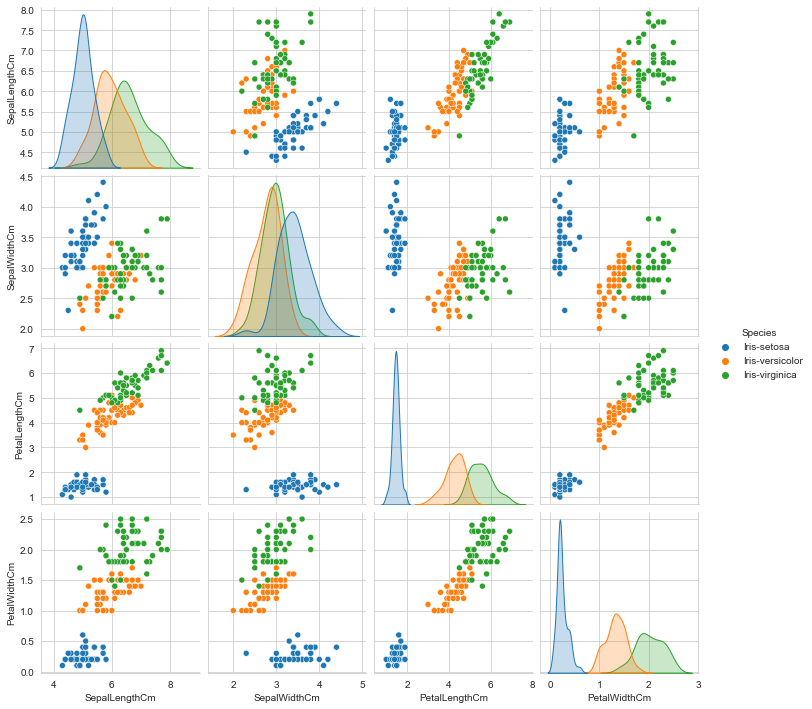

In [20]:
#pair plot
sns.pairplot(df,hue='Species')
plt.show()

In [ ]:
#By looking the result of pair plot we sure that all blue points are well separated with other two classes. 
#But Versicolor and virginica are partially overlapping with each other.

In [29]:
#defining x and y variable
X = df.drop('Species',axis=1)
Y = df['Species']

In [30]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [31]:
Y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 150 entries, 0 to 149
Series name: Species
Non-Null Count  Dtype 
--------------  ----- 
150 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [ ]:
#Decision Tree Algorithm

In [32]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.33, random_state = 1)

In [33]:
from sklearn.tree import DecisionTreeClassifier
max_depth = []
for i in range(1,17,1):
    DTC = DecisionTreeClassifier(max_depth = i , criterion ="gini", max_features = 0.8)
    DTC.fit(X_train,Y_train)
    Y_pred_train = DTC.predict(X_train)
    Y_pred_test = DTC.predict(X_test)
    Training_accuracy_DTC = accuracy_score(Y_train,Y_pred_train)
    Test_accuracy_DTC = accuracy_score(Y_test,Y_pred_test)
    max_depth.append((i, Training_accuracy_DTC ,Test_accuracy_DTC))
    
df_DTC = pd.DataFrame(max_depth, columns=['D',' Training_accuracy_DTC','Test_accuracy_DTC'])
print(df_DTC)

     D   Training_accuracy_DTC  Test_accuracy_DTC
0    1                    0.69               0.62
1    2                    0.94               0.98
2    3                    0.98               0.96
3    4                    0.98               0.96
4    5                    1.00               0.96
5    6                    1.00               0.96
6    7                    1.00               0.96
7    8                    1.00               0.96
8    9                    1.00               0.96
9   10                    1.00               0.96
10  11                    1.00               0.96
11  12                    1.00               0.96
12  13                    1.00               0.96
13  14                    1.00               0.96
14  15                    1.00               0.96
15  16                    1.00               0.96


Training_accuracy DTC: 0.98
Test_accuracy DTC: 0.96


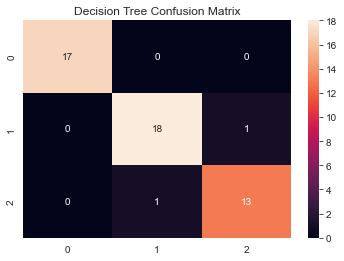

[[17  0  0]
 [ 0 18  1]
 [ 0  1 13]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        17
Iris-versicolor       0.95      0.95      0.95        19
 Iris-virginica       0.93      0.93      0.93        14

       accuracy                           0.96        50
      macro avg       0.96      0.96      0.96        50
   weighted avg       0.96      0.96      0.96        50



In [34]:
DTC = DecisionTreeClassifier(max_depth = 3 , criterion ="gini", max_features = 0.8)
DTC.fit(X_train,Y_train)

Y_pred_train = DTC.predict(X_train)
Y_pred_test = DTC.predict(X_test)

from sklearn.metrics import accuracy_score
Training_accuracy_DTC = accuracy_score(Y_train,Y_pred_train)
Testing_accuracy_DTC = accuracy_score(Y_test,Y_pred_test)
print("Training_accuracy DTC:" , Training_accuracy_DTC.round(3))
print("Test_accuracy DTC:" , Testing_accuracy_DTC.round(3))

plt.title('Decision Tree Confusion Matrix')
sns.heatmap(confusion_matrix(Y_test,Y_pred_test),annot=True,fmt='g')
plt.show()

print(confusion_matrix(Y_test,Y_pred_test))
print(classification_report(Y_test,Y_pred_test))

In [ ]:
#Visualize decision tree

[Text(0.375, 0.875, 'X[3] <= 0.8\ngini = 0.665\nsamples = 100\nvalue = [33, 31, 36]'),
 Text(0.25, 0.625, 'gini = 0.0\nsamples = 33\nvalue = [33, 0, 0]'),
 Text(0.5, 0.625, 'X[3] <= 1.65\ngini = 0.497\nsamples = 67\nvalue = [0, 31, 36]'),
 Text(0.25, 0.375, 'X[2] <= 5.0\ngini = 0.165\nsamples = 33\nvalue = [0, 30, 3]'),
 Text(0.125, 0.125, 'gini = 0.0\nsamples = 29\nvalue = [0, 29, 0]'),
 Text(0.375, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.75, 0.375, 'X[2] <= 4.85\ngini = 0.057\nsamples = 34\nvalue = [0, 1, 33]'),
 Text(0.625, 0.125, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.875, 0.125, 'gini = 0.0\nsamples = 30\nvalue = [0, 0, 30]')]

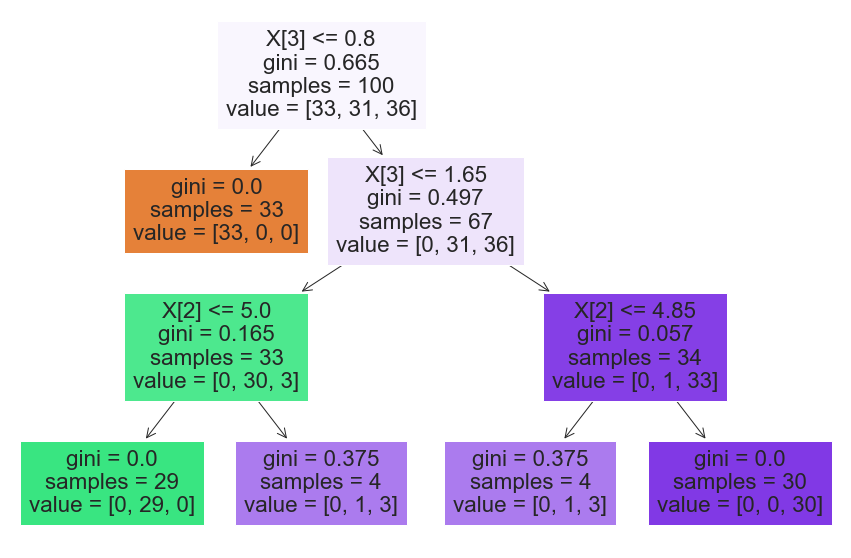

In [38]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
plt.figure(figsize=(15, 10))
tree.plot_tree(DTC, filled=True)